In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("ggplot")

In [3]:
df = pd.read_csv("http://taanila.fi/BlackFriday.csv", encoding="cp1252")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(537577, 12)

Todella monta riviä, kolumneja onneksi vain 12.

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df.columns = ['User ID', 'Product ID', 'Gender', 'Age', 'Occupation', 'City category',
       'In current city, years', 'Marital status', 'Product category 1',
       'Product category 2', 'Product category 3', 'Purchase']
df.columns

Index(['User ID', 'Product ID', 'Gender', 'Age', 'Occupation', 'City category',
       'In current city, years', 'Marital status', 'Product category 1',
       'Product category 2', 'Product category 3', 'Purchase'],
      dtype='object')

In [7]:
for var in df:
    print(var, pd.unique(df[var]))

User ID [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product ID ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender ['F' 'M']
Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City category ['A' 'C' 'B']
In current city, years ['2' '4+' '3' '1' '0']
Marital status [0 1]
Product category 1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Product category 2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product category 3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase [ 8370 15200  1422 ... 14539 11120 18426]


Sukupuolet (Gender) voisi muuntaa sanoiksi kirjainten sijasta, lisäksi naimisassa olemisen (Marital status) voisi ilmaista helpommin (0=ei ja 1=kyllä).

In [8]:
df["Gender"] = df["Gender"].replace({"F" : "Female", "M" : "Male"})
df["Marital status"] = df["Marital status"].replace({0 : "No", 1 : "Yes"})
df.head(10)

,User ID,Product ID,Gender,Age,Occupation,City category,"In current city, years",Marital status,Product category 1,Product category 2,Product category 3,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,No,3,NaN,NaN,8370
1,1000001,P00248942,Female,0-17,10,A,2,No,1,6.0,14.0,15200
2,1000001,P00087842,Female,0-17,10,A,2,No,12,NaN,NaN,1422
3,1000001,P00085442,Female,0-17,10,A,2,No,12,14.0,NaN,1057
4,1000002,P00285442,Male,55+,16,C,4+,No,8,NaN,NaN,7969
5,1000003,P00193542,Male,26-35,15,A,3,No,1,2.0,NaN,15227
6,1000004,P00184942,Male,46-50,7,B,2,Yes,1,8.0,17.0,19215
7,1000004,P00346142,Male,46-50,7,B,2,Yes,1,15.0,NaN,15854
8,1000004,P0097242,Male,46-50,7,B,2,Yes,1,16.0,NaN,15686
9,1000005,P00274942,Male,26-35,20,A,1,Yes,8,NaN,NaN,7871


In [9]:
df.count()

User ID                   537577
Product ID                537577
Gender                    537577
Age                       537577
Occupation                537577
City category             537577
In current city, years    537577
Marital status            537577
Product category 1        537577
Product category 2        370591
Product category 3        164278
Purchase                  537577
dtype: int64

Kaikki ovat siis ostaneet jotain ja vastanneet kaikkiin kohtiin, Product category -kohdista luonnollisesti jotkin ovat tyhjiä riippuen siitä mitä on ostettu. Seuraavasta selviää, että miesasiakkaita on ollut huomattavasti enemmän.

In [27]:
count_m = df[df['Gender']=='Male'].count()[0]
count_f = df[df['Gender']=='Female'].count()[0]
print('Male clients:',count_m)
print('Female clients:',count_f)

Male clients: 405380
Female clients: 132197


Text(0.5, 0, 'Purchase')

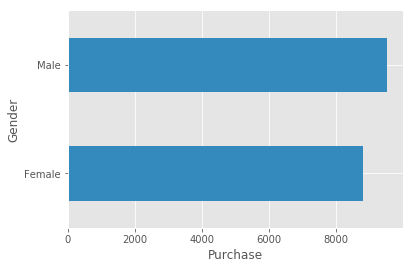

In [10]:
df.pivot_table(values="Purchase", index="Gender").plot.barh(color=["C1"], legend=False)
plt.xlabel("Purchase")

Keskimäärin miehet ostivat enemmän kuin naiset, mutta naiset ostivat enemmän erilaisia tuotteita, kuten seuraavasta näkyy.

Text(0.5, 1.0, 'Unique Item Purchases by Gender')

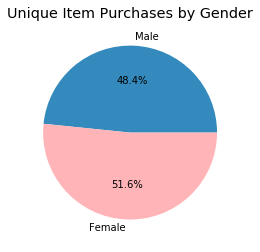

In [20]:
plt.pie(df.groupby('Gender')['Product ID'].nunique(),labels=['Male','Female'],
       shadow=False, autopct='%1.1f%%',colors=['C1','C6'])
plt.title('Unique Item Purchases by Gender')

Text(0.5, 1.0, 'Unique Products by Age')

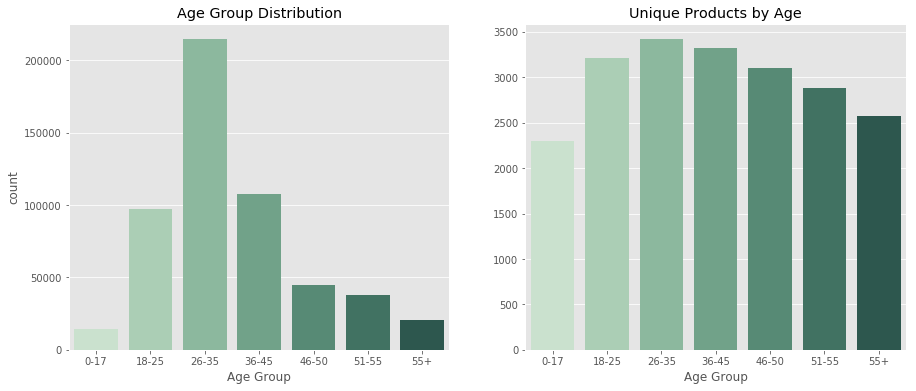

In [29]:
prod_byage = df.groupby('Age').nunique()['Product ID']

fig,ax = plt.subplots(1,2,figsize=(15,6))
ax = ax.ravel()

sns.countplot(df['Age'].sort_values(),ax=ax[0], palette=("ch:2.5,-.2,dark=.3"))
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette=("ch:2.5,-.2,dark=.3"))
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

Eli ikäluokista 26-35-vuotiaat ostivat eniten. Keskiarvo ostoksissa oli seuraava:

Text(0.5, 1.0, 'Average Purchases per Age Group')

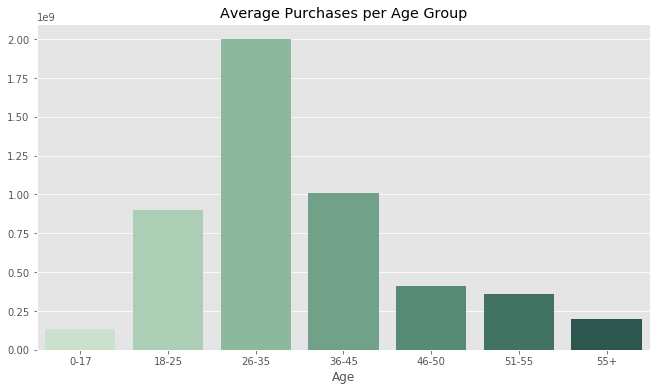

In [33]:
spent_byage = df.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(11,6))

sns.barplot(x=spent_byage.index,y=spent_byage.values, palette=("ch:2.5,-.2,dark=.3"))
plt.title('Average Purchases per Age Group')

26-35-vuotiaat ostivat myös ostosten keskiarvon mukaan eniten. Tämä on tai ainakin tulisi olla todellinen kohderyhmä.